# Classifying Fashion-MNIST

Теперь ваша очередь строить и обучать нейронную сеть. Вы будете использовать [набор данных Fashion-MNIST] (https://github.com/zalandoresearch/fashion-mnist), заменяющий набор данных MNIST. MNIST на самом деле довольно тривиален с нейронными сетями, где вы можете легко достичь точности выше 97%. Fashion-MNIST - это набор 28x28 черно-белых изображений одежды. Он более сложный, чем MNIST, поэтому он лучше отображает реальную производительность вашей сети и лучше отображает наборы данных, которые вы будете использовать в реальном мире.

![image.png](attachment:image.png)

В этом ноутбуке вы создадите свою собственную нейронную сеть. По большей части, вы можете просто скопировать и вставить код из предыдущей часть, но это бесполезно, вас это умнее не сделает. Для вас важно написать код самостоятельно и заставить его работать. Не стесняйтесь обращаться к предыдущим ноутбукам, но работайте над этим сами.

Прежде всего, давайте загрузим набор данных через torchvision.

In [0]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Можем посмотреть на пример изображения

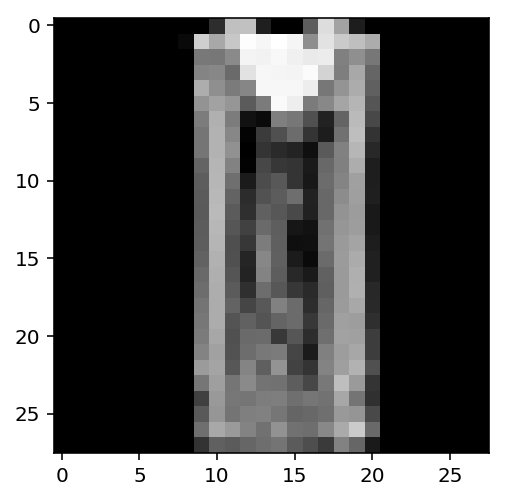

In [0]:
image, label = next(iter(trainloader))
plt.imshow(image[0].numpy().squeeze(), cmap='Greys_r');

## Построение сети

Здесь вы должны определить свою сеть. Как и в MNIST, каждое изображение имеет размер 28x28, что в общей сложности составляет 784 пикселя, также есть 10 классов. Вы должны использовать хотя бы один скрытый слой. Предлагаем вам использовать активации ReLU для внутренних слоев, и log-softmax для внешнего. Сколько слоев вы добавляете и размер этих слоев вы устанавливаете сами.

In [0]:
# TODO: Define your network architecture here
model = nn.Sequential(nn.Linear(784, 128), 
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))


# Тренируй сеть

Теперь вы должны создать свою сеть и обучить ее. Сначала вам нужно определить лосс (http://pytorch.org/docs/master/nn.html#loss-functions ) (что-то вроде `nn.CrossEntropyLoss`) и оптимизатор (http://pytorch.org/docs/master/optim.html ) (обычно `optim.SGD` или` optim.Adam`).

Затем напишите код обучения модели. Помните, что тренировочный проход довольно простой процесс:

* Сделайте прямой проход через сеть, чтобы получить логиты
* Используйте логиты для расчета потерь
* Выполните обратный проход по сети с помощью `loss.backward()` для вычисления градиентов.
* Сделайте шаг с оптимизатором, чтобы обновить веса

Регулируя гиперпараметры (скрытые нейроны, learning rate и т.д.), вы должны получить ошибку обучения ниже 0.4.

In [0]:
# TODO: Create the network, define the criterion and optimizer
model = nn.Sequential(nn.Linear(784, 128), 
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))


criterion=nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.03)
image, label = next(iter(trainloader))

In [0]:
# TODO: Train the network here
epoch=3
for i in range (epoch):
  for image, label in trainloader:
    image=image.view(image.shape[0], -1)
    out=model(image)
    loss=criterion(out, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

tensor([[2.7855e-03, 9.8642e-05, 3.5809e-01, 1.6095e-03, 2.0208e-01, 6.9581e-05,
         4.2396e-01, 4.7352e-06, 1.1309e-02, 3.8137e-06]])

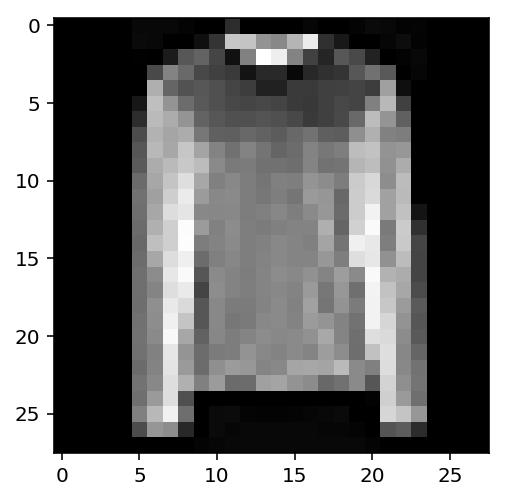

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[54]
plt.imshow(img.numpy().squeeze(), cmap='Greys_r');
# Convert 2D image to 1D vector
img = img.resize_(1, 784)
with torch.no_grad():
  log=model(img)
# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(log)
ps
# Plot the image and probabilities
#helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')